In [2]:
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Descargar stopwords en caso de que aún no lo hayas hecho
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Función para preprocesar el texto
def preprocess_text(text):
    # Conversión a minúsculas
    text = text.lower()
    # Eliminación de signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenización y eliminación de stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

# Leer el corpus desde un archivo .txt
with open("02tfidfmatrixcorpus.txt", "r", encoding="utf-8") as file:
    documents = file.readlines()

# Preprocesamiento de los documentos
preprocessed_docs = [preprocess_text(doc) for doc in documents]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Vectorización del corpus con TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_docs)


In [5]:
# Lista de consultas
queries = [
    "inteligencia artificial en medicina",
    "beneficios de la educación a distancia",
    "realidad aumentada en videojuegos",
    "desarrollo personal y hábitos saludables",
    "futuro del comercio electrónico",
    "tecnologías en cine moderno",
    "competencias de e-sports",
    "diagnóstico con dispositivos portátiles",
    "literatura de ciencia ficción",
    "plataformas de streaming"
]

# Preprocesamiento de las consultas
preprocessed_queries = [preprocess_text(query) for query in queries]
query_vectors = vectorizer.transform(preprocessed_queries)


In [6]:
import pandas as pd

# Creación del DataFrame de la matriz TF-IDF
tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar la matriz TF-IDF
print(tfidf_matrix_df)


   acceder  accesibles    acceso    además  adopción  adoptando    ahora  \
0  0.00000    0.000000  0.000000  0.000000   0.00000   0.185647  0.00000   
1  0.00000    0.000000  0.000000  0.000000   0.00000   0.000000  0.20114   
2  0.00000    0.000000  0.000000  0.000000   0.00000   0.000000  0.00000   
3  0.19072    0.000000  0.000000  0.000000   0.00000   0.000000  0.00000   
4  0.00000    0.000000  0.346757  0.173379   0.00000   0.000000  0.00000   
5  0.00000    0.000000  0.000000  0.000000   0.00000   0.000000  0.00000   
6  0.00000    0.000000  0.000000  0.000000   0.19583   0.000000  0.00000   
7  0.00000    0.197191  0.000000  0.000000   0.00000   0.000000  0.00000   

   alcanzado  algoritmos  aplicaciones  ...  ubicación   usuario  utilizan  \
0    0.00000    0.185647       0.00000  ...    0.00000  0.000000  0.000000   
1    0.20114    0.000000       0.00000  ...    0.00000  0.000000  0.000000   
2    0.00000    0.000000       0.00000  ...    0.00000  0.198805  0.000000   
3  

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Cálculo de la similitud coseno entre consultas y documentos
cosine_similarities = cosine_similarity(query_vectors, tfidf_matrix)

# Ranking de los documentos para cada consulta
top_k = 5  # Puedes ajustar el número de documentos relevantes que quieres mostrar

for i, query in enumerate(queries):
    print(f"\nConsulta: '{query}'")
    # Obtenemos los índices de los documentos en orden de mayor a menor similitud
    ranked_doc_indices = cosine_similarities[i].argsort()[::-1][:top_k]
    print("Documentos más relevantes:")
    for rank, index in enumerate(ranked_doc_indices, start=1):
        print(f"{rank}. Documento {index + 1} (Similitud: {cosine_similarities[i][index]:.4f})")



Consulta: 'inteligencia artificial en medicina'
Documentos más relevantes:
1. Documento 8 (Similitud: 0.2757)
2. Documento 6 (Similitud: 0.1571)
3. Documento 2 (Similitud: 0.1471)
4. Documento 1 (Similitud: 0.1358)
5. Documento 5 (Similitud: 0.0000)

Consulta: 'beneficios de la educación a distancia'
Documentos más relevantes:
1. Documento 4 (Similitud: 0.3303)
2. Documento 8 (Similitud: 0.0000)
3. Documento 6 (Similitud: 0.0000)
4. Documento 7 (Similitud: 0.0000)
5. Documento 5 (Similitud: 0.0000)

Consulta: 'realidad aumentada en videojuegos'
Documentos más relevantes:
1. Documento 2 (Similitud: 0.3307)
2. Documento 5 (Similitud: 0.0741)
3. Documento 7 (Similitud: 0.0000)
4. Documento 8 (Similitud: 0.0000)
5. Documento 6 (Similitud: 0.0000)

Consulta: 'desarrollo personal y hábitos saludables'
Documentos más relevantes:
1. Documento 7 (Similitud: 0.3768)
2. Documento 2 (Similitud: 0.0734)
3. Documento 6 (Similitud: 0.0000)
4. Documento 8 (Similitud: 0.0000)
5. Documento 5 (Similitud

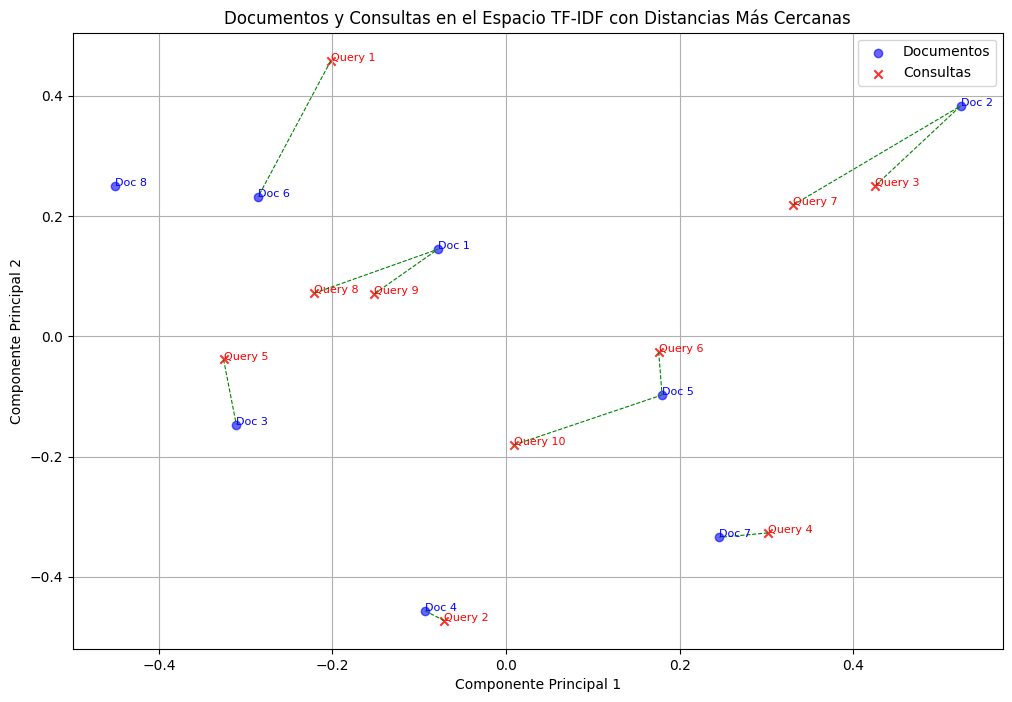

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import numpy as np

# Concatenar documentos y consultas en la misma matriz
all_texts = preprocessed_docs + preprocessed_queries
all_tfidf_matrix = vectorizer.fit_transform(all_texts)

# Reducir la matriz TF-IDF a 2 dimensiones usando PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(all_tfidf_matrix.toarray())

# Separar las coordenadas de los documentos y de las consultas
doc_coords = tfidf_2d[:len(preprocessed_docs)]
query_coords = tfidf_2d[len(preprocessed_docs):]

# Crear un gráfico de dispersión para documentos y consultas
plt.figure(figsize=(12, 8))
plt.scatter(doc_coords[:, 0], doc_coords[:, 1], color='blue', alpha=0.6, label="Documentos")
plt.scatter(query_coords[:, 0], query_coords[:, 1], color='red', alpha=0.8, marker='x', label="Consultas")

# Etiquetas de los documentos
for i, doc in enumerate(doc_coords):
    plt.text(doc[0], doc[1], f'Doc {i+1}', fontsize=8, color="blue")

# Etiquetas de las consultas
for j, query in enumerate(query_coords):
    plt.text(query[0], query[1], f'Query {j+1}', fontsize=8, color="red")

# Calcular y dibujar la distancia más cercana
for j, query in enumerate(query_coords):
    # Calcular distancias entre la consulta y todos los documentos
    distances = cdist([query], doc_coords, metric='euclidean')[0]
    closest_doc_index = np.argmin(distances)
    closest_doc_coords = doc_coords[closest_doc_index]

    # Dibujar una línea hacia el documento más cercano
    plt.plot([query[0], closest_doc_coords[0]], [query[1], closest_doc_coords[1]], color='green', linestyle="--", linewidth=0.8)

# Personalización del gráfico
plt.title("Documentos y Consultas en el Espacio TF-IDF con Distancias Más Cercanas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid()
plt.show()
